In [ ]:
#QUESTION:perform classification/regression on your dataset using KNeighborsClassifier orKNeighborsRegressor, 
#as applicable, and print the performance.

In [45]:
#I need to build a model to be used to predict sex of a new or unknown case. 

# Reading data & checking top few data rows

import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline


In [46]:
import os
os.getcwd()
os.chdir('/Users/ameneh/Downloads')

In [47]:
#read the file
df = pd.read_csv('/Users/ameneh/Downloads/diabetes.data',
                 sep='\s+',
                 header=0)


df.tail(10)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
AGE    442 non-null int64
SEX    442 non-null int64
BMI    442 non-null float64
BP     442 non-null float64
S1     442 non-null int64
S2     442 non-null float64
S3     442 non-null float64
S4     442 non-null float64
S5     442 non-null float64
S6     442 non-null int64
Y      442 non-null int64
dtypes: float64(6), int64(5)
memory usage: 38.1 KB


In [48]:
#Let’s see how many of each class is in our data set
df['SEX'].value_counts()

1    235
2    207
Name: SEX, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1960b470>]],
      dtype=object)

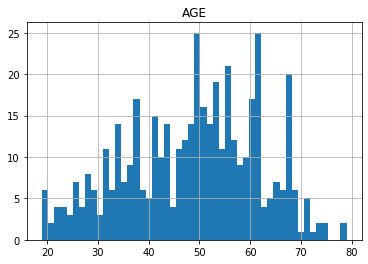

In [49]:
df.hist(column='AGE', bins=50)

In [50]:
df.columns

Index(['AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'Y'], dtype='object')

In [51]:
# COLUMN BELOW IS JUST FOR REMINDING ME AND IS NOT PART OF THE CODE

In [52]:
#make a numpy array of our dataframe to give to scikit learn library
#x = df[['AGE', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'Y']] .values
#x = pd.DataFrame(index=range(0,len(df)),columns=['AGE', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'Y'])
#type(x)
#x= np.array(df.drop).astype(float))

In [53]:
X = np.array(df.drop(['SEX'], 1).astype(float))
y = np.array(df['SEX'])

In [54]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)


Train set: (353, 10) (353,)
Test set: (89, 10) (89,)


In [55]:
#k-nearest neighbors
#importing libraries
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [56]:
x_train_scaled = scaler.fit_transform(x_train)
x_train_scaled

array([[0.53333333, 0.55785124, 0.43661972, ..., 0.69998947, 0.87931034,
        0.46835443],
       [0.63333333, 0.21487603, 0.6384507 , ..., 0.62209976, 0.79310345,
        0.30063291],
       [0.56666667, 0.10330579, 0.22535211, ..., 0.25655516, 0.15517241,
        0.12658228],
       ...,
       [0.68333333, 0.28512397, 0.53056338, ..., 0.30503001, 0.5       ,
        0.33860759],
       [0.56666667, 0.38429752, 0.28169014, ..., 0.5511601 , 0.46551724,
        0.39873418],
       [0.71666667, 0.65702479, 0.54929577, ..., 0.61044614, 0.63793103,
        0.49050633]])

In [57]:
#scaling data
x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)
x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)



In [58]:
from sklearn.neighbors import KNeighborsClassifier#THIS LIBRARY CLASSIFY DATA AND LABLE IT ACCORDING TO ITS 
                                                 #TRAIN SET

In [59]:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [60]:
yhat = neigh.predict(x_test)
yhat[:5]

array([1, 2, 2, 1, 1])

In [61]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.7932011331444759
Test set Accuracy:  0.5955056179775281


In [62]:
params = 10
mean_acc = np.zeros((params-1))
std_acc = np.zeros((params-1))
ConfustionMx = [];
for n in range(1,params):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    yhat=neigh.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.57303371, 0.57303371, 0.62921348, 0.59550562, 0.70786517,
       0.56179775, 0.65168539, 0.59550562, 0.62921348])

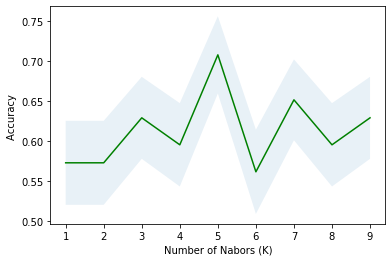

In [63]:
plt.plot(range(1,params),mean_acc,'g')
plt.fill_between(range(1,params),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.show()